In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='facebook/opt-350m'

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
gammas = [2,4,8,16]
lr = 1.0e-5


for g in gammas:
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=0.0,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          accumulation_steps=2,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search facebook/opt-350m, learning rate 1e-05 focal loss, gamma: 2


Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	3.2594	Val Loss:	1.1972	Accuracy:	0.4118	F1:	0.3560
2 / 20: Train Loss:	1.0250	Val Loss:	0.8966	Accuracy:	0.6387	F1:	0.6042
3 / 20: Train Loss:	0.6893	Val Loss:	0.8489	Accuracy:	0.5966	F1:	0.6003
4 / 20: Train Loss:	0.6259	Val Loss:	0.8087	Accuracy:	0.6050	F1:	0.5953
5 / 20: Train Loss:	0.6395	Val Loss:	0.7391	Accuracy:	0.7227	F1:	0.7216
6 / 20: Train Loss:	0.6453	Val Loss:	0.7291	Accuracy:	0.6891	F1:	0.6710
7 / 20: Train Loss:	0.6790	Val Loss:	0.9360	Accuracy:	0.5462	F1:	0.4964
8 / 20: Train Loss:	0.6223	Val Loss:	0.8392	Accuracy:	0.6891	F1:	0.6926
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.82      0.71      0.76        38
oversimplification       0.55      0.83      0.66        36
slothful induction       0.81      0.56      0.66        45

          accuracy                           0.69       119
         macro avg       0.72     

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	2.9522	Val Loss:	1.1869	Accuracy:	0.3697	F1:	0.2986
2 / 20: Train Loss:	0.7506	Val Loss:	0.9809	Accuracy:	0.4286	F1:	0.3759
3 / 20: Train Loss:	0.3082	Val Loss:	0.8798	Accuracy:	0.6218	F1:	0.6142
4 / 20: Train Loss:	0.3103	Val Loss:	0.8311	Accuracy:	0.6723	F1:	0.6613
5 / 20: Train Loss:	0.2664	Val Loss:	0.7961	Accuracy:	0.6639	F1:	0.6427
6 / 20: Train Loss:	0.2699	Val Loss:	0.7601	Accuracy:	0.6639	F1:	0.6476
7 / 20: Train Loss:	0.2714	Val Loss:	0.7442	Accuracy:	0.6807	F1:	0.6675
8 / 20: Train Loss:	0.2620	Val Loss:	0.7415	Accuracy:	0.6807	F1:	0.6797
9 / 20: Train Loss:	0.2546	Val Loss:	0.7433	Accuracy:	0.7059	F1:	0.7051
10 / 20: Train Loss:	0.2471	Val Loss:	0.9049	Accuracy:	0.5966	F1:	0.5869
11 / 20: Train Loss:	0.3010	Val Loss:	1.2492	Accuracy:	0.4454	F1:	0.4232
12 / 20: Train Loss:	0.6919	Val Loss:	1.0681	Accuracy:	0.4874	F1:	0.4164
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-s

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	1.6938	Val Loss:	1.3368	Accuracy:	0.3697	F1:	0.2974
2 / 20: Train Loss:	0.1746	Val Loss:	0.9620	Accuracy:	0.5126	F1:	0.4855
3 / 20: Train Loss:	0.1113	Val Loss:	0.9740	Accuracy:	0.4790	F1:	0.4320
4 / 20: Train Loss:	0.1276	Val Loss:	0.8735	Accuracy:	0.6471	F1:	0.6428
5 / 20: Train Loss:	0.1532	Val Loss:	0.9486	Accuracy:	0.4286	F1:	0.3886
6 / 20: Train Loss:	0.2037	Val Loss:	0.9452	Accuracy:	0.4622	F1:	0.4254
7 / 20: Train Loss:	0.2069	Val Loss:	0.9393	Accuracy:	0.5294	F1:	0.4859
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.41      0.92      0.57        38
oversimplification       1.00      0.17      0.29        36
slothful induction       0.79      0.49      0.60        45

          accuracy                           0.53       119
         macro avg       0.73      0.53      0.49       119
      weighted avg       0.73      0.53      0

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	1.3680	Val Loss:	1.2412	Accuracy:	0.3782	F1:	0.2976
2 / 20: Train Loss:	0.0435	Val Loss:	0.9915	Accuracy:	0.5294	F1:	0.4962
3 / 20: Train Loss:	0.0127	Val Loss:	0.9708	Accuracy:	0.5042	F1:	0.4915
4 / 20: Train Loss:	0.0104	Val Loss:	0.9585	Accuracy:	0.5210	F1:	0.5041
5 / 20: Train Loss:	0.0076	Val Loss:	0.9614	Accuracy:	0.4622	F1:	0.4391
6 / 20: Train Loss:	0.0071	Val Loss:	0.9578	Accuracy:	0.5294	F1:	0.5209
7 / 20: Train Loss:	0.0083	Val Loss:	0.9427	Accuracy:	0.5882	F1:	0.5879
8 / 20: Train Loss:	0.0058	Val Loss:	0.9430	Accuracy:	0.6050	F1:	0.6069
9 / 20: Train Loss:	0.0065	Val Loss:	0.9388	Accuracy:	0.6218	F1:	0.6243
10 / 20: Train Loss:	0.0059	Val Loss:	0.9260	Accuracy:	0.6639	F1:	0.6625
11 / 20: Train Loss:	0.0071	Val Loss:	0.9323	Accuracy:	0.5630	F1:	0.5588
12 / 20: Train Loss:	0.0074	Val Loss:	0.9373	Accuracy:	0.5546	F1:	0.5350
13 / 20: Train Loss:	0.0058	Val Loss:	0.9211	Accuracy:	0.5714	F1:	0.5708
No improvement for 3 epochs. Stopping early.
best (higgest m

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

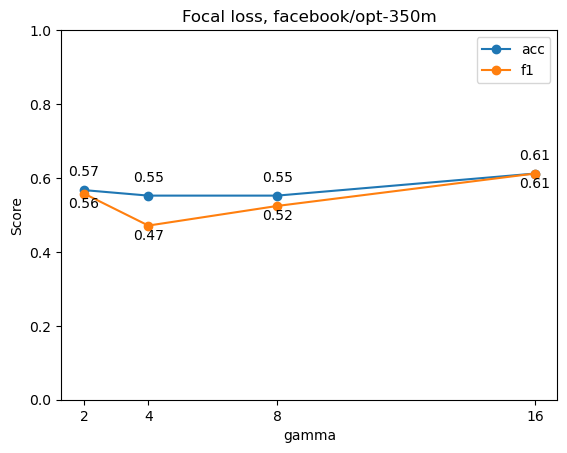

In [6]:
def plot_grid_search(df, title, column):

    # Create the plot
    ax = df.plot(x=column, y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row[column], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row[column], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df[column], [val for val in df[column]], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, {model_checkpoint}', 'g')